In [7]:
import torch
import sys 
import os 

import numpy as np
import matplotlib.pyplot as plt
import sys
from PIL import Image

from gta_cityscapes_dataset_creation import GTA_CityscapesDataset

['/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/vguarin/.local/lib/python3.9/site-packages', '/usr/local/lib64/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', '/fast/AG_Kainmueller/vguarin/aggrigator_experiments/']
Loaded 24 semantic classes
Color mapping contains 35 colors
Valid trainIDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [8]:
from pathlib import Path 
split_path = '/fast/AG_Kainmueller/data/GTA_ValUES_splits/GTA_id_test'
split_path = Path(split_path)
        
with open(split_path, "r") as f:
    sample_names = [
        line.strip().split(".")[0] 
        for line in f 
        if line.strip().endswith(".tif")
    ]
print(len(sample_names))

5482


In [9]:
import _pickle as cPickle
file = "/fast/AG_Kainmueller/data/GTA/splits/firstCycle/splits.pkl"

with open(file, "rb") as input_file:
    e = cPickle.load(input_file)
    
e


[{'train': [('00001.npy', 'gta'),
   ('00003.npy', 'gta'),
   ('00004.npy', 'gta'),
   ('00006.npy', 'gta'),
   ('00007.npy', 'gta'),
   ('00011.npy', 'gta'),
   ('00012.npy', 'gta'),
   ('00013.npy', 'gta'),
   ('00014.npy', 'gta'),
   ('00018.npy', 'gta'),
   ('00020.npy', 'gta'),
   ('00023.npy', 'gta'),
   ('00028.npy', 'gta'),
   ('00032.npy', 'gta'),
   ('00033.npy', 'gta'),
   ('00038.npy', 'gta'),
   ('00039.npy', 'gta'),
   ('00041.npy', 'gta'),
   ('00042.npy', 'gta'),
   ('00043.npy', 'gta'),
   ('00044.npy', 'gta'),
   ('00045.npy', 'gta'),
   ('00046.npy', 'gta'),
   ('00049.npy', 'gta'),
   ('00053.npy', 'gta'),
   ('00055.npy', 'gta'),
   ('00056.npy', 'gta'),
   ('00059.npy', 'gta'),
   ('00060.npy', 'gta'),
   ('00061.npy', 'gta'),
   ('00062.npy', 'gta'),
   ('00063.npy', 'gta'),
   ('00064.npy', 'gta'),
   ('00067.npy', 'gta'),
   ('00068.npy', 'gta'),
   ('00070.npy', 'gta'),
   ('00071.npy', 'gta'),
   ('00073.npy', 'gta'),
   ('00075.npy', 'gta'),
   ('00076.npy',

In [10]:
image_path = "/fast/AG_Kainmueller/data/GTA/CityScapesOriginalData/preprocessed/images/" #OriginalData instead of CityScapesOriginalData to evaluate the GTA iD test set
mask_path = "/fast/AG_Kainmueller/data/GTA/CityScapesOriginalData/preprocessed/labels/" #OriginalData instead of CityScapesOriginalData to evaluate on GTA iD test set
uq_map_path = "/fast/AG_Kainmueller/data/GTA_CityScapes_UQ/"
prediction_path = mask_path

In [15]:
extra_info = {
        'task' : 'semantic',
        'variation' : 'cityscapes', 
        'model_noise' : 0,
        'data_noise': '1_00', #0_00 for evaluating on GTA iD test set 
        'uq_method': 'dropout',
        'decomp' : 'pu',
        'spatial' : None,
        'split_path' : "/fast/AG_Kainmueller/data/GTA_ValUES_splits/Cityscapes_ood", # GTA_id_test is the file name for the GTA iD test set samples
        'split' : None
    }

sc_dset = GTA_CityscapesDataset(image_path, 
                                mask_path, 
                                uq_map_path, 
                                prediction_path, 
                                'abc',
                                **extra_info)

In [21]:
IDX = 99
print(sc_dset[IDX].keys())

# Convert the mask with the unique ID values into an RGB mask for visualisation purposes
def label_to_rgb(label_map, label_colors):
        """Converts a (H, W) label map to an (H, W, 3) RGB overlay."""
        h, w = label_map.shape
        rgb = np.zeros((h, w, 3), dtype=np.uint8)
        for label, color in label_colors.items():
            mask = (label_map == label)
            rgb[mask] = color[1]
        return rgb


sem_maps_colors = sc_dset.get_semantic_mapping()
# Generate colored masks and predictions
mask_rgb = label_to_rgb(sc_dset[IDX]["mask"], sem_maps_colors)
pred_rgb = label_to_rgb(sc_dset[IDX]["prediction"], sem_maps_colors)


dict_keys(['image', 'mask', 'uq_map', 'prediction', 'pred_colors', 'sample_name'])


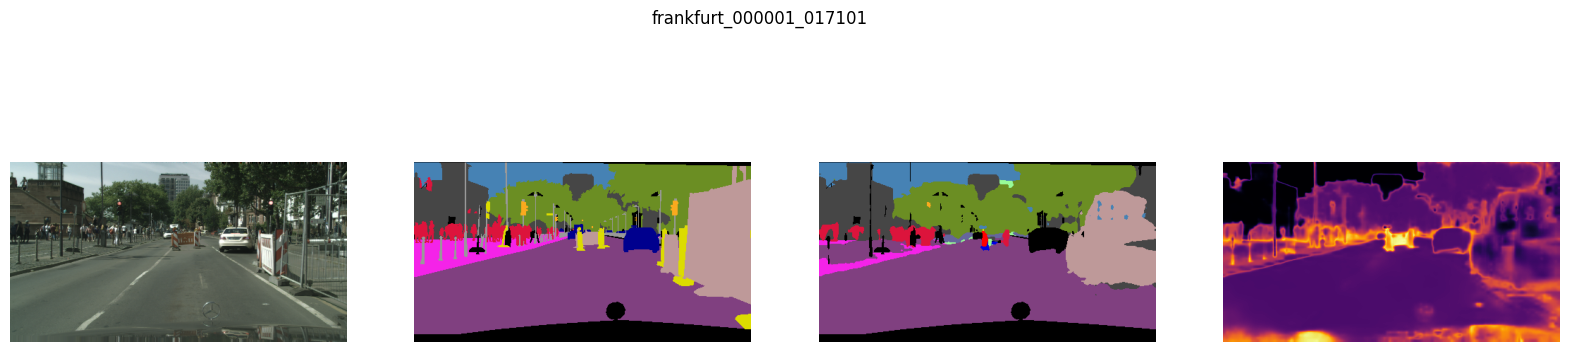

In [24]:
IDX = 99
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(sc_dset[IDX]["image"].transpose(1,2,0))
plt.axis("off")

plt.subplot(142)
plt.imshow(mask_rgb)
plt.axis("off")

plt.subplot(143)
plt.imshow(pred_rgb)
plt.axis("off")

plt.subplot(144)
plt.imshow(sc_dset[IDX]["uq_map"], cmap='inferno')
plt.axis("off")

plt.suptitle(sc_dset[IDX]["sample_name"])

plt.show()